# Changes made to the Historical-transaction-data.csv
- Removed rows with less than 1 quantity_sold value:  8351
- No of item_description values generated:  1994
- No of invoice_ids generated:  4228

## Above changes are saved to a new csv file Historical-transaction-cleaned-data.csv

In [1]:
import pandas as pd
import seaborn as sns

historical_transactions = pd.read_csv("data/Historical-transaction-cleaned-data.csv")
historical_transactions["invoice_id"] = historical_transactions["invoice_id"].astype(int)
historical_transactions["transaction_date"] = pd.to_datetime(historical_transactions["transaction_date"])
historical_transactions.sort_values(by='transaction_date', inplace=True)

In [2]:
historical_transactions.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
168929,GINGER BEER 1L,2021-10-15 00:00:00+00:00,2156337,YD1K,SHOP043,150,2
123031,CREAM SODA APPLE POP 1L,2021-10-15 00:00:00+00:00,2284533,UFWU,SHOP121,150,2
110010,GINGER BEER 500ML,2021-10-15 00:00:00+00:00,1985977,IA4W,SHOP038,100,1
212775,FIT O MIXED FRUIT 200ML,2021-10-15 00:00:00+00:00,1253209,SXQW,SHOP097,60,1
123030,ORANGE BARLEY 1.5L,2021-10-15 00:00:00+00:00,2284495,4KZY,SHOP121,220,1


In [3]:
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465623 entries, 168929 to 424435
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   item_description  465623 non-null  object             
 1   transaction_date  465623 non-null  datetime64[ns, UTC]
 2   invoice_id        465623 non-null  int64              
 3   customer_id       465623 non-null  object             
 4   shop_id           465623 non-null  object             
 5   item_price        465623 non-null  int64              
 6   quantity_sold     465623 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 28.4+ MB


In [4]:
historical_transactions.describe()

,invoice_id,item_price,quantity_sold
count,4.656230e+05,465623.000000,465623.000000
mean,2.080991e+06,207.493713,1.960066
std,1.520811e+06,167.877778,1.628437
min,1.700000e+01,35.000000,1.000000
25%,1.038512e+06,100.000000,1.000000
50%,2.046136e+06,200.000000,2.000000
75%,3.070249e+06,220.000000,2.000000
max,8.335982e+06,17400.000000,101.000000


In [5]:
print("\n* Historical-transaction-cleaned-data.csv SUMMARY *\n")
# Column names
print(f"{', '.join(historical_transactions.columns.tolist())} are the column names")
# No of rows
print(f"{len(historical_transactions)} total rows")

# Unique shop ids
shop_ids = historical_transactions["shop_id"].unique()
print(f"{len(shop_ids)} unique shop_id")

# Unique items
item_ids = historical_transactions["item_description"].unique()
print(f"{len(item_ids)} unique item_description")

# Unique transaction date
transaction_dates = historical_transactions["transaction_date"].unique()
print(f"{len(transaction_dates)} unique transaction_date")

# Unique item price
item_prices = historical_transactions["item_price"].unique()
print(f"{len(item_prices)} unique item_price")

# Unique quantity sold
quantities_sold = historical_transactions["quantity_sold"].unique()
print(f"{len(quantities_sold)} unique quantity_sold")


* Historical-transaction-cleaned-data.csv SUMMARY *

item_description, transaction_date, invoice_id, customer_id, shop_id, item_price, quantity_sold are the column names
465623 total rows
124 unique shop_id
2031 unique item_description
62 unique transaction_date
209 unique item_price
67 unique quantity_sold


/var/folders/d0/m5gt_pdn4n9fxzyw8jv02vcc0000gn/T/ipykernel_3786/1359164938.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  historical_transactions['transaction_month'] = historical_transactions['transaction_date'].dt.to_period('M')


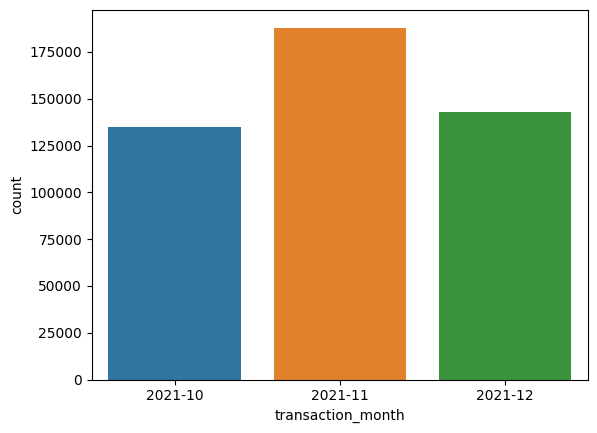

In [6]:
historical_transactions['transaction_month'] = historical_transactions['transaction_date'].dt.to_period('M')
ax = sns.countplot(x="transaction_month", data=historical_transactions)

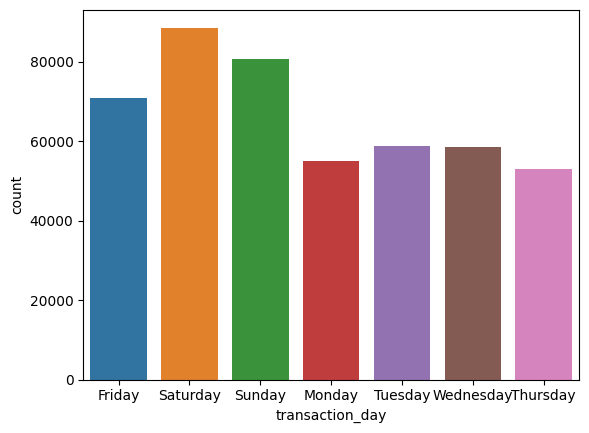

In [7]:
historical_transactions['transaction_day'] = historical_transactions['transaction_date'].dt.day_name()
ax = sns.countplot(x="transaction_day", data=historical_transactions)

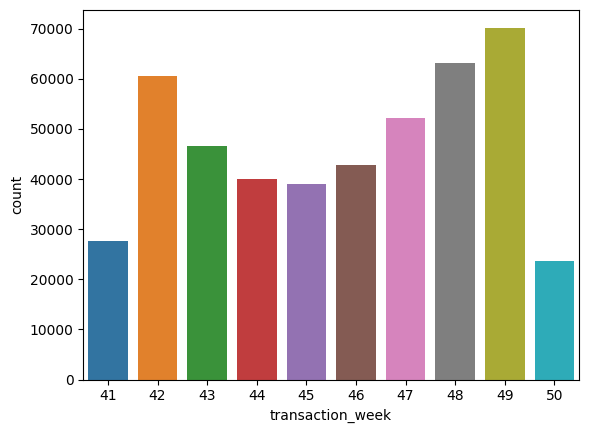

In [8]:
historical_transactions['transaction_week'] = historical_transactions['transaction_date'].dt.isocalendar().week
ax = sns.countplot(x="transaction_week", data=historical_transactions)